#### IMPORTING LIBRARIES

In [77]:
from matplotlib import animation as animation
from matplotlib import pyplot as plt
import numpy as np

#### QUESTION 1.1

##### 1.1.1 (also in pdf):

In [78]:
# this is the same code taught in tutorial. It is a numerical solution of 1D heat diffusion.

# initialising the variables and setting the initial condition.

L = 0.2
n = 20
T1 = 60 
T2 = 30 
alpha = 0.0001 
time = 120 
dx = L/n
dt = 0.1

# making the numpy arrays for storing value and plotting graph.

x = np.linspace(dx/2, L-dx/2, n)
T = np.zeros(n) 
dTdt = np.empty(n) 
t = np.arange(0, time, dt)

# main code.

plt.ion()
for j in range(1, len(t)):
    for i in range(1, n-1):
        dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2 + (T[i+1]-T[i])/dx**2) 
    dTdt[0] = alpha*(-(T[0]-T1)/dx**2 + (T[1]-T[0])/dx**2)
    dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2 + (T2-T[n-1])/dx**2)
    T = T + dTdt*dt 
    plt.figure(1)
    plt.plot(x, T)
    plt.axis([0, L, 0, 70]) 
    plt.xlabel('Distance in meters')
    plt.ylabel('Temperature in C')
    plt.show()
    plt.pause(0.0001)
    plt.clf()

##### 1.1.2 is in pdf.
##### 1.1.3:

In [79]:
# initialising the variables.

pause = 0.01
dx = 0.001
dt = 0.1
n = 65
time = 10
L = n * dx
D = dx**2 / 2 / dt

In [80]:
# making numpy arrays to store values and plot graphs

x = np.linspace(dx/2, L - dx/2, n)

P = np.zeros(n)
P[int(n/2)] = 1

dPdt = np.zeros(n)

taxis = np.arange(0, time, dt)
M = np.zeros(len(taxis))
MSD = np.zeros(len(taxis))

plt.ion()
for t in range(len(taxis)):
    for i in range(1, n-1):
        dPdt[i] = D*(((P[i+1]-P[i])/dx**2) - ((P[i]-P[i-1])/dx**2)) 
    P = P + dPdt*dt
    for i in range(0, n):
        M[t] += P[i]*x[i]
    for i in range(0, n):
        MSD[t] += P[i]*((x[i]-M[t])**2)
    plt.figure(1)
    plt.plot(x, P)
    plt.axis([0, L, 0, 1]) 
    plt.xlabel('Distance')
    plt.ylabel('Probability')
    plt.show()
    plt.pause(0.01)
    plt.clf()

##### 1.1.4 Part 1: Mean Displacement

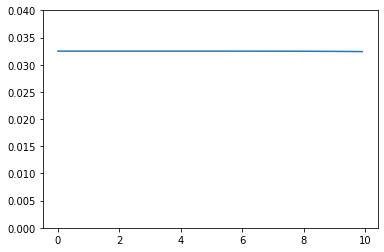

In [81]:
plt.plot(taxis, M)
plt.ylim(0, 0.04)
plt.show()

##### 1.1.4 Part 2: Mean Square Displacement

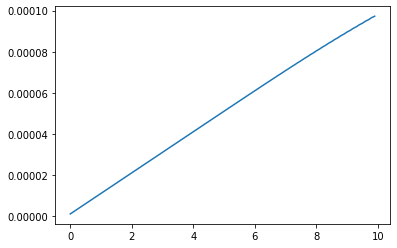

In [82]:
plt.plot(taxis, MSD)
plt.show()

#### QUESTION 1.2

##### 1.2.1, 1.2.2, 1.2.3 are in pdf.
##### 1.2.4 (also in pdf) :
* In part 1.2.4, I have assumed that when the disc and the metal plate come in contact, their temperature instataneously becomes 500 K.

In [83]:
# we will define a 2D array containing temperatures of each point.

# initialising the varaibles

x = 10
y = 10
dx = 0.1
dy = 0.1
D = 4
xn = int(x / dx)
yn = int(y / dy)
time_iterations = 101

# calculating the initial conditions

t_array = np.empty([time_iterations, xn, yn])

for i in range(xn):
    for j in range(yn):
        if (((i*dx) - 5)**2 + ((j*dy) - 5)**2 > 1):
            t_array[0][i][j] = 300
        else:
            t_array[0][i][j] = 500

# print(t_array[0][int(xn/2)])

##### 1.2.5 (also in pdf) :

In [84]:
dt = 0.01 / 4 * D # solved in pdf

def next_t_array(t_array):
    for x in range(time_iterations - 1):
        for i in range(1, xn - 1):
            for j in range(1, yn - 1):
                t_array[x+1][i][j] = t_array[x][i][j] + (D*dt/(dx**2)) * (t_array[x][i+1][j] + t_array[x][i-1][j] + t_array[x][i][j+1] + t_array[x][i][j-1] - 4*t_array[x][i][j])

    return t_array

##### 1.2.6:

MovieWriter ffmpeg unavailable; using Pillow instead.


Done!


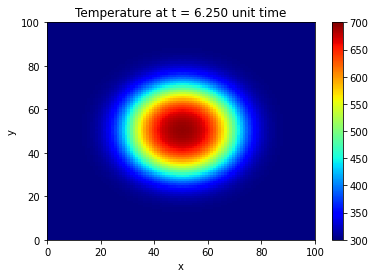

In [85]:
plate_length = 100                  
max_iter_time = 101
disc_center_x = int(plate_length/2)
disc_center_y = int(plate_length/2)

D = 4
delta_x = 1                     

delta_t = (delta_x ** 2)/(4 * D)
gamma = (D * delta_t) / (delta_x ** 2)

u = np.empty((max_iter_time, plate_length, plate_length))

u_initial = 300.0

u_top = 300.0
u_left = 300.0
u_bottom = 300.0
u_right = 300.0

u.fill(u_initial)

for i in range(1, plate_length-1, delta_x):
    for j in range(1, plate_length-1, delta_x):
        if((disc_center_x-i)*(disc_center_x-i)+(disc_center_y-j)*(disc_center_y-j)<400):
            u[0][i][j] = 700


def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        # print(k)
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=300, vmax=700)
    plt.colorbar()

    return plt

u = calculate(u)


def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")